# Notebook: Create basic nn example with tensorflow/keras
<b> Author: </b> Ian (well, official tf tutorial mostly) <br>

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Get db from keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 1us/step


In [8]:
# Class names - as represented by the int of their index
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
len(train_labels)

60000

In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
test_images.shape

(10000, 28, 28)

### Preprocess

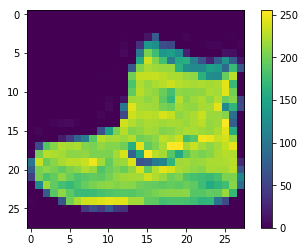

In [18]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [19]:
# Scale the pixel values from 0-250 to 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0

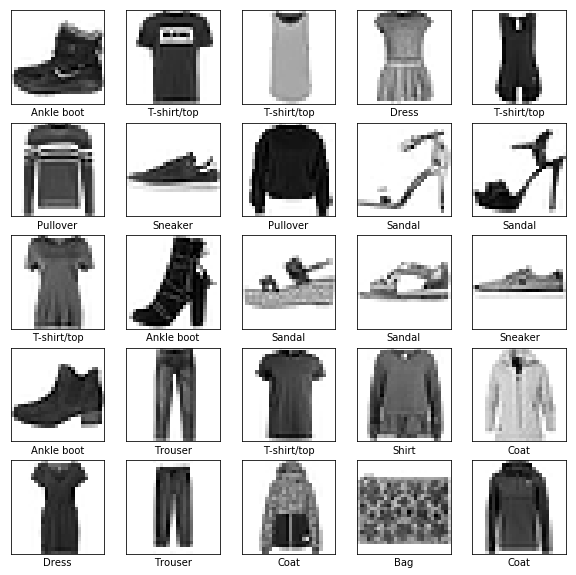

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [21]:
# 1. Establish the model architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #This layer takes the nd array and makes it into a series, no params
    keras.layers.Dense(128, activation=tf.nn.relu), #Dense layers are fully connected, this one 128 nodes
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
# ??? How is the number of nodes decided? Final layer has no. of outcome vars

In [22]:
# 2. Compile the model (give it loss func, optimise func and eval metric)
model.compile(optimizer=tf.train.AdamOptimizer(), # determines how the model is adapted based on loss func
              loss='sparse_categorical_crossentropy', # measure of accuracy during training
              metrics=['accuracy']) # measure for train and testing steps 

In [23]:
# 3. Train
model.fit(train_images, train_labels, epochs=5) # ??? How is the number of epochs decided, rule of thumb? elbow?

Epoch 1/5
60000/60000 [==============================] - 7s 113us/step - loss: 0.4949 - acc: 0.8256
Epoch 2/5
60000/60000 [==============================] - 7s 114us/step - loss: 0.3729 - acc: 0.8645
Epoch 3/5
60000/60000 [==============================] - 15s 246us/step - loss: 0.3366 - acc: 0.8764
Epoch 4/5
60000/60000 [==============================] - 15s 249us/step - loss: 0.3131 - acc: 0.8848
Epoch 5/5
60000/60000 [==============================] - 8s 141us/step - loss: 0.2956 - acc: 0.8915


In [24]:
# 4. Evaluate
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 61us/step
Test accuracy: 0.8729


In [25]:
# Now that that's done we can make predictions with the model on a set of images
predictions = model.predict(test_images)

In [26]:
predictions[0]
# These 10 numbers correspond to confidence that the model assigns to each of the 10 possible answers

array([1.1702299e-06, 5.7407036e-08, 3.7466305e-07, 4.1442775e-08,
       1.5049920e-07, 7.8220721e-03, 1.5679027e-06, 9.7237313e-03,
       5.9295176e-06, 9.8244482e-01], dtype=float32)

In [27]:
# Get the index of the highest confidence:
np.argmax(predictions[0])

9

In [28]:
# Is that prediction correct?
test_labels[0]

9

In [29]:
# Let's plot the answers... this python plotting is a whole skillset

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

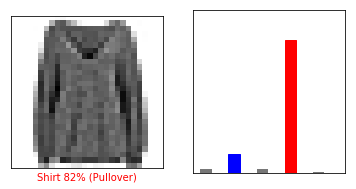

In [40]:
# Change i to whatever prediction you like. Blue is correct, red is incorrect
i = 49
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

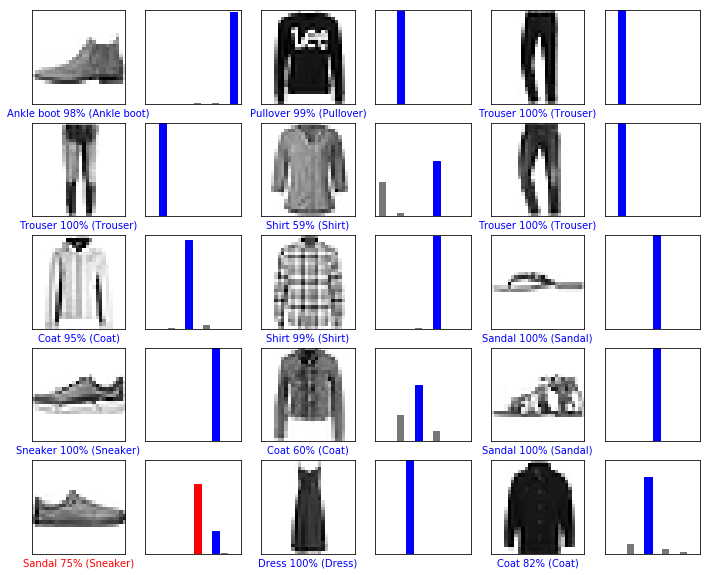

In [41]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

Now we're going to make a prediction based on a single image. 
Because the software is designed for batches, we need to first turn this single image into a batch

In [42]:
# Grab an image from the test dataset
img = test_images[0]
print(img.shape)

(28, 28)


In [ ]:
predictions_single = model.predict(img)
print(predictions_single)